# C prototype 

This notebook is used for analyzing the latency properties of the C prototype, whose code is stored in `<project root>/c/realtime`.

## Running the experiment

For a more detailed explanation of how the latency experiment run on the different prototypes works, see the "Running the experiment" section in [05_results_python.ipynb](./05_results_python.ipynb). This notebook will just explain the commands necessary to build the C prototype and run the latency procedure on it for the echo and LMS filters.

### Dependencies

**TODO: Figure these out**

### Building the binary

Unlike Python and Julia, C is not an interpreted language, and requires that a program be compiled into a binary before being run. To build the binary for the C prototype, first navigate to `<project root>/c/realtime/build`, and then run the commands:
```console
> conan install ..
> cmake ..
> make
```
If the build process runs successfully, the resulting binary will be located at `<project root>/c/realtime/build/bin/realtime`.

### Echo filter

To run the latency procedure for the echo filter, you will need two separate terminal windows (make sure the project root is the working directory in both terminals). First, use the following command to launch the processor in the first terminal:
```console
>  c/realtime/build/bin/realtime processor --host 127.0.0.1 --port 8889 --filter echo
```
Once the processor instance is running, use this command to start the probe in the second terminal (this will start the experiment):
```console
> c/realtime/build/bin/realtime probe --host 127.0.0.1 --port 8889 --input data/processed/test_spks_c.h5 --output data/results/c_echo.h5
```
This setup runs both the processor and probe instances on `localhost`, communicating through port 8889. To run them on different machines or a different port, just change these values.

### LMS filter

To run the experiment for the LMS filter, use the same commands with the `--filter` option for the processor instance changed from `echo` to `lms`, and the output filename changed:

Terminal 1:
```console
>  c/realtime/build/bin/realtime processor --host 127.0.0.1 --port 8889 --filter lms
```
Terminal 2:
```console
> c/realtime/build/bin/realtime probe --host 127.0.0.1 --port 8889 --input data/processed/test_spks_c.h5 --output data/results/c_lms.h5
```

## Imports

In [2]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load filter outputs from file

In [3]:
ECHO_FPATH = '../data/results/c_echo.h5'
LMS_FPATH = '../data/results/c_lms.h5'

with h5py.File(ECHO_FPATH, 'r') as f:
    fp_echo = f['filter_preds'][:].T
    rt_echo = f['rt_times_us'][:].T
    
with h5py.File(LMS_FPATH, 'r') as f:
    fp_lms = f['filter_preds'][:].T
    rt_lms = f['rt_times_us'][:].T

## Latency distribution

### Summary statistics

In [4]:
print('Echo filter')
print(f'    min: {np.min(rt_echo):.2f} us')
print(f'    max: {np.max(rt_echo):.2f} us')
print(f'    mean: {np.mean(rt_echo):.2f} us')
print(f'    median: {np.median(rt_echo):.2f} us')

print('')
print('LMS filter')
print(f'    min: {np.min(rt_lms):.2f} us')
print(f'    max: {np.max(rt_lms):.2f} us')
print(f'    mean: {np.mean(rt_lms):.2f} us')
print(f'    median: {np.median(rt_lms):.2f} us')

Echo filter
    min: 21.00 us
    max: 15442.00 us
    mean: 37.71 us
    median: 29.00 us

LMS filter
    min: 1195.00 us
    max: 21061.00 us
    mean: 1563.50 us
    median: 1531.00 us


### Full distribution

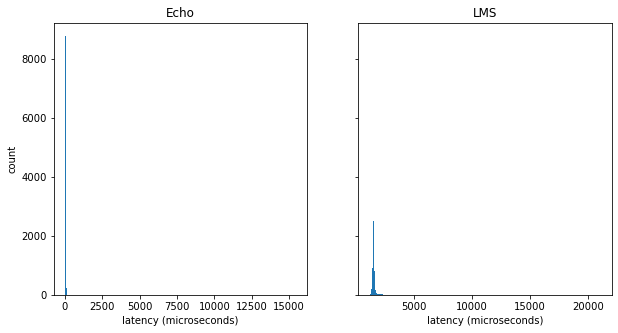

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].set_title('Echo');
ax[0].hist(rt_echo, bins=500)
ax[0].set(ylabel='count')
ax[0].set(xlabel='latency (microseconds)')

ax[1].set_title('LMS');
ax[1].hist(rt_lms, bins=500);
ax[1].set(xlabel='latency (microseconds)');

### Distribution with outliers removed

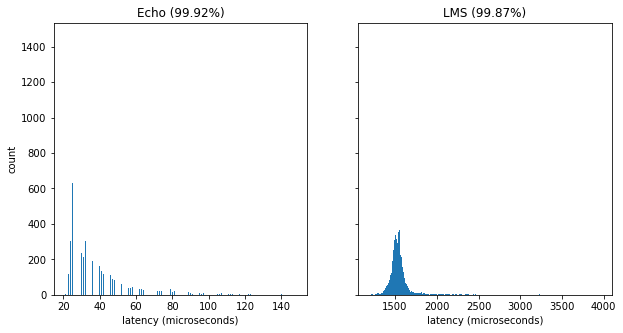

In [6]:
# Max values for histogram (all larger values will be excluded)
ECHO_MAX = 150
LMS_MAX = 4000

# Latency values to plot
rt_echo_plt = rt_echo[rt_echo < ECHO_MAX]
rt_lms_plt = rt_lms[rt_lms < LMS_MAX]

# Percentages of values included
pct_echo = rt_echo_plt.shape[0] / rt_echo.shape[0] * 100
pct_lms = rt_lms_plt.shape[0] / rt_lms.shape[0] * 100

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].set_title(f'Echo ({pct_echo:.2f}%)');
ax[0].hist(rt_echo[rt_echo < ECHO_MAX], bins=500)
ax[0].set(ylabel='count')
ax[0].set(xlabel='latency (microseconds)')

ax[1].set_title(f'LMS ({pct_lms:.2f}%)');
ax[1].hist(rt_lms[rt_lms < LMS_MAX], bins=500);
ax[1].set(xlabel='latency (microseconds)');